In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("south+german+credit+update/SouthGermanCredit.asc", delimiter=" ")
df

laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0           1        18      4     2   1049         1        2     4       2   
1           1         9      4     0   2799         1        3     2       3   
2           2        12      2     9    841         2        4     2       2   
3           1        12      4     0   2122         1        3     3       3   
4           1        12      4     0   2171         1        3     4       3   
..        ...       ...    ...   ...    ...       ...      ...   ...     ...   
995         1        24      2     3   1987         1        3     2       3   
996         1        24      2     0   2303         1        5     4       3   
997         4        21      4     0  12680         5        5     4       3   
998         2        12      2     3   6468         5        1     2       3   
999         1        30      2     2   6350         5        5     4       3   

     buerge  wohnzeit  verm  alter  weitkred  wohn  bishkred  beruf  pers  \
0         1         4     2     21         3     1         1      3     2   
1         1         2     1     36         3     1         2      3     1   
2         1         4     1     23         3     1         1      2     2   
3         1         2     1     39         3     1         2      2     1   
4         1         4     2     38         1     2         2      2     2   
..      ...       ...   ...    ...       ...   ...       ...    ...   ...   
995       1         4     1     21         3     1         1      2     1   
996       2         1     1     45         3     2         1      3     2   
997       1         4     4     30         3     3         1      4     2   
998       1         1     4     52         3     2         1      4     2   
999       1         4     2     31         3     2         1      3     2   

     telef  gastarb  kredit  
0        1        2       1  
1        1        2       1  
2        1        2       1  
3        1        1       1  
4        1        1       1  
..     ...      ...     ...  
995      1        2       0  
996      1        2       0  
997      2        2       0  
998      2        2       0  
999      1        2       0  

[1000 rows x 21 columns]

In [4]:
df.isna().sum()

# в датасеті відсутні пропущєні дані

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
kredit      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [6]:
for c in df.columns:
    df[c] = df[c].astype("int16")

# змінили типи даних для заощадження місця.

In [8]:
# перед тим як проводити аналіз головних компонент, масштабуємо наші дані. Це забезпечить рівнозначність всіх ознак
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

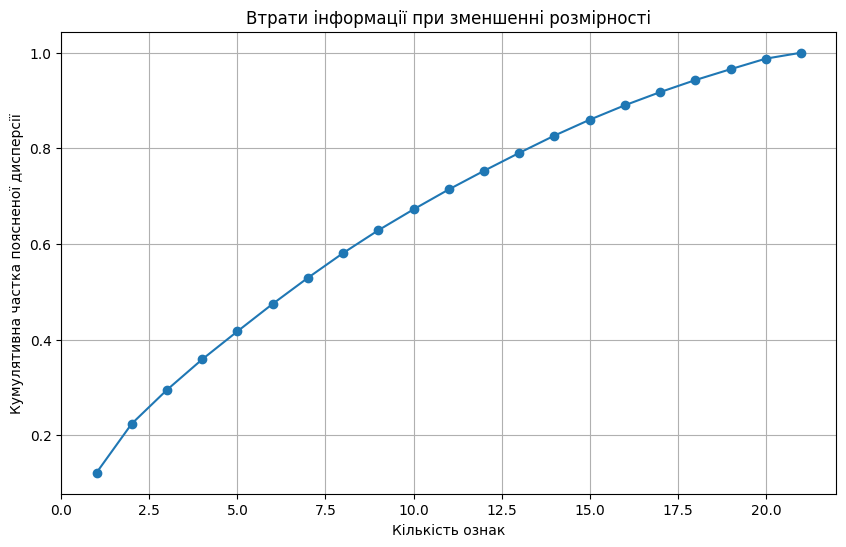

In [9]:
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(scaled_df)

explained_variance_ratio = pca.explained_variance_ratio_  # частки дисперсії, пояснені кожною компонентою
cumulative_variance = np.cumsum(explained_variance_ratio)  # кумулятивна сума поясненої дісперсіх

# Побудова графіку втрати інформації при зменшенні розмірності
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-') 
plt.xlabel('Кількість ознак')
plt.ylabel('Кумулятивна частка поясненої дисперсії')
plt.title('Втрати інформації при зменшенні розмірності')
plt.grid()
plt.show()


In [10]:
explained_variance_ratio

array([0.12157518, 0.10247799, 0.07079505, 0.06383366, 0.05855806,
       0.05740068, 0.05451232, 0.05182615, 0.04767885, 0.0437363 ,
       0.04164017, 0.03896215, 0.03749237, 0.03619061, 0.0331466 ,
       0.03034508, 0.0274295 , 0.02522312, 0.02273072, 0.02207129,
       0.01237415])

In [11]:
cumulative_variance

array([0.12157518, 0.22405317, 0.29484822, 0.35868189, 0.41723995,
       0.47464063, 0.52915295, 0.58097909, 0.62865795, 0.67239425,
       0.71403442, 0.75299657, 0.79048894, 0.82667955, 0.85982615,
       0.89017122, 0.91760072, 0.94282384, 0.96555456, 0.98762585,
       1.        ])

In [12]:
val_index = np.argmax(cumulative_variance >= 0.7)  # отримуємо індекс значення в масиві
features_count = val_index +1
print(f'Необхідна кількість ознак: {features_count}')

Необхідна кількість ознак: 11


In [13]:
# для розуміння капнемо трохи в сторону того як створюються головні компоненти

pca_components = pca.components_ # отримали вектори навантажень всіх головних компонент.4
# По факту тут ми бачимо як впливає кожна оригінальна ознака на створення конкретної головної компоненти
pca_components

array([[-0.00117412,  0.41766542, -0.00319784,  0.10411219,  0.42536031,
         0.07992172,  0.15746638,  0.04662917,  0.0206194 , -0.12358379,
         0.14737763,  0.41174889,  0.16955664, -0.10544992,  0.28666587,
         0.06480127,  0.33992637, -0.02455252,  0.33108131,  0.16266176,
        -0.1224267 ],
       [ 0.32783119, -0.19973384,  0.41822219, -0.0623818 , -0.18124687,
         0.20802248,  0.33046506,  0.10181329,  0.1416665 , -0.07031021,
         0.1995303 , -0.05359015,  0.33912826,  0.10167794,  0.1398677 ,
         0.31252888, -0.02226538, -0.12705511,  0.08130395, -0.04281221,
         0.37785202],
       [ 0.41457119,  0.04431391,  0.08192994,  0.02831171,  0.13839803,
         0.25379731, -0.17481622, -0.1613995 , -0.16592909, -0.21475151,
        -0.21572527, -0.06708467, -0.27501636,  0.27892508, -0.24035655,
        -0.13868353,  0.24501505,  0.3443263 ,  0.21420912,  0.09950659,
         0.29827713],
       [-0.01660618, -0.11089857, -0.08819814,  0.11344252

In [14]:
#  для зручності розуміння, переведемо матрицю навантажень векторів у датафрейм

pca_df = pd.DataFrame(pca_components[:features_count], columns=df.columns) # як ми бачили, ми отримуємо головні компоненти за зменшенням долі опису дісперсії,
#тож перші 11 компонент будуть найбільш значущими
pca_df.T  # тут ми вже можемо наглядно побачити вагові коефіцієнти кожної ознаки для кожної компоненти

0         1         2         3         4         5   \
laufkont -0.001174  0.327831  0.414571 -0.016606 -0.170995 -0.207571   
laufzeit  0.417665 -0.199734  0.044314 -0.110899  0.074363 -0.113681   
moral    -0.003198  0.418222  0.081930 -0.088198  0.498098 -0.020367   
verw      0.104112 -0.062382  0.028312  0.113443  0.052039 -0.427826   
hoehe     0.425360 -0.181247  0.138398 -0.412445  0.070313  0.035114   
sparkont  0.079922  0.208022  0.253797 -0.057249 -0.424000  0.056911   
beszeit   0.157466  0.330465 -0.174816  0.098396 -0.136087  0.077909   
rate      0.046629  0.101813 -0.161400  0.597662 -0.003282 -0.219690   
famges    0.020619  0.141666 -0.165929 -0.077388 -0.158299 -0.468116   
buerge   -0.123584 -0.070310 -0.214752 -0.232267  0.026283 -0.080384   
wohnzeit  0.147378  0.199530 -0.215725  0.099343 -0.037298  0.508266   
verm      0.411749 -0.053590 -0.067085  0.093565 -0.078710  0.072130   
alter     0.169557  0.339128 -0.275016 -0.005422 -0.101913  0.220688   
weitkred -0.105450  0.101678  0.278925  0.085062  0.168874  0.292604   
wohn      0.286666  0.139868 -0.240357  0.041023 -0.152444 -0.153693   
bishkred  0.064801  0.312529 -0.138684 -0.142628  0.570822 -0.161503   
beruf     0.339926 -0.022265  0.245015  0.101182  0.057359  0.021887   
pers     -0.024553 -0.127055  0.344326  0.329819  0.161446  0.099912   
telef     0.331081  0.081304  0.214209 -0.041949  0.044522  0.018442   
gastarb   0.162662 -0.042812  0.099507  0.423524  0.133567 -0.071353   
kredit   -0.122427  0.377852  0.298277 -0.136036 -0.201685 -0.112639   

                6         7         8         9         10  
laufkont -0.146275 -0.028535 -0.006248  0.068919 -0.064032  
laufzeit  0.044636  0.174186 -0.372167  0.234301 -0.119289  
moral     0.039007 -0.117566 -0.104882  0.038872 -0.173005  
verw     -0.278433  0.498151  0.206527  0.203898  0.283542  
hoehe    -0.004274  0.077570 -0.148231  0.128432 -0.023252  
sparkont -0.123324  0.217832 -0.291974 -0.168883 -0.327438  
beszeit   0.128328  0.286053 -0.131748  0.059032  0.054990  
rate      0.301136  0.049850 -0.154430 -0.069936 -0.204583  
famges    0.365958 -0.070760 -0.304659 -0.143585  0.242908  
buerge    0.448360  0.305960  0.225204  0.371416 -0.169702  
wohnzeit -0.017296  0.346929 -0.085781 -0.078596  0.085189  
verm     -0.047196 -0.290754 -0.030059  0.009901 -0.122425  
alter    -0.096246  0.012481  0.295907  0.221947  0.036813  
weitkred  0.261722 -0.130202 -0.338530  0.385205  0.492320  
wohn     -0.084193 -0.466192  0.146381  0.387538 -0.085505  
bishkred -0.162016  0.074945 -0.044817 -0.194608 -0.147767  
beruf     0.384010 -0.076948  0.260806 -0.229287  0.060659  
pers      0.150453  0.118815  0.152953  0.258788 -0.454864  
telef     0.210456  0.070726  0.390307 -0.339237  0.239446  
gastarb  -0.330592  0.021716 -0.055592  0.109867  0.257636  
kredit    0.054098 -0.001027  0.187435  0.215953  0.038589

Подивимось як зміниться t-SNE репрезентація при зменшенні розмірності

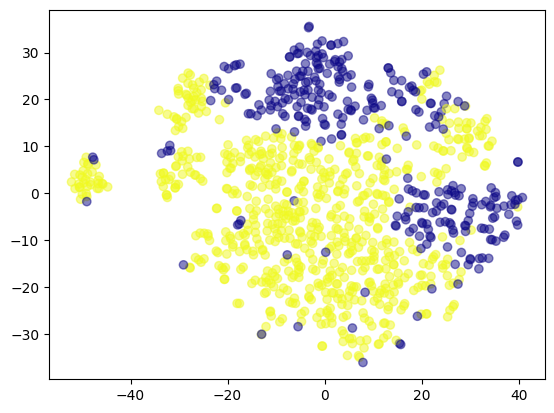

In [20]:
from sklearn.manifold import TSNE

tsne_orig = TSNE(random_state=42)
tsne_orig_repr = tsne_orig.fit_transform(scaled_df)

plt.scatter(tsne_orig_repr[:, 0], tsne_orig_repr[:, 1], cmap="plasma", c=df["kredit"], alpha=.5)

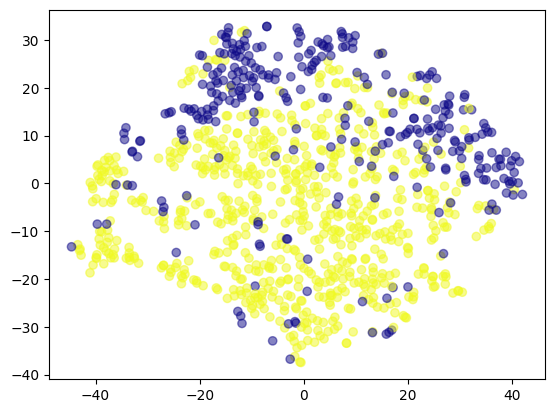

In [29]:
df_reduced = pca.transform(scaled_df)[:, :features_count]

tsne_reduced = TSNE(random_state=42)
tsne_reduced_repr = tsne_reduced.fit_transform(df_reduced)

plt.scatter(tsne_reduced_repr[:, 0], tsne_reduced_repr[:, 1], cmap="plasma", c=df["kredit"], alpha=.5)

In [46]:
#  загальна картина на репрезентації дійсно майже не змінилась. 
# Але якщо взяти ознаку "kredit" - то ми бачимо деякі зміни. 


[-1.72689656 -0.69688571  0.57997435  1.17254941  1.38501508  1.19218204
  0.46140045  0.30009393 -0.49568791 -0.45621648 -0.13781809  0.11806671
  0.07675049 -0.06193355  1.32179758 -0.20566969  1.74357251  0.7685164
  0.50233787  0.89438634  0.08654659]


<Axes: >

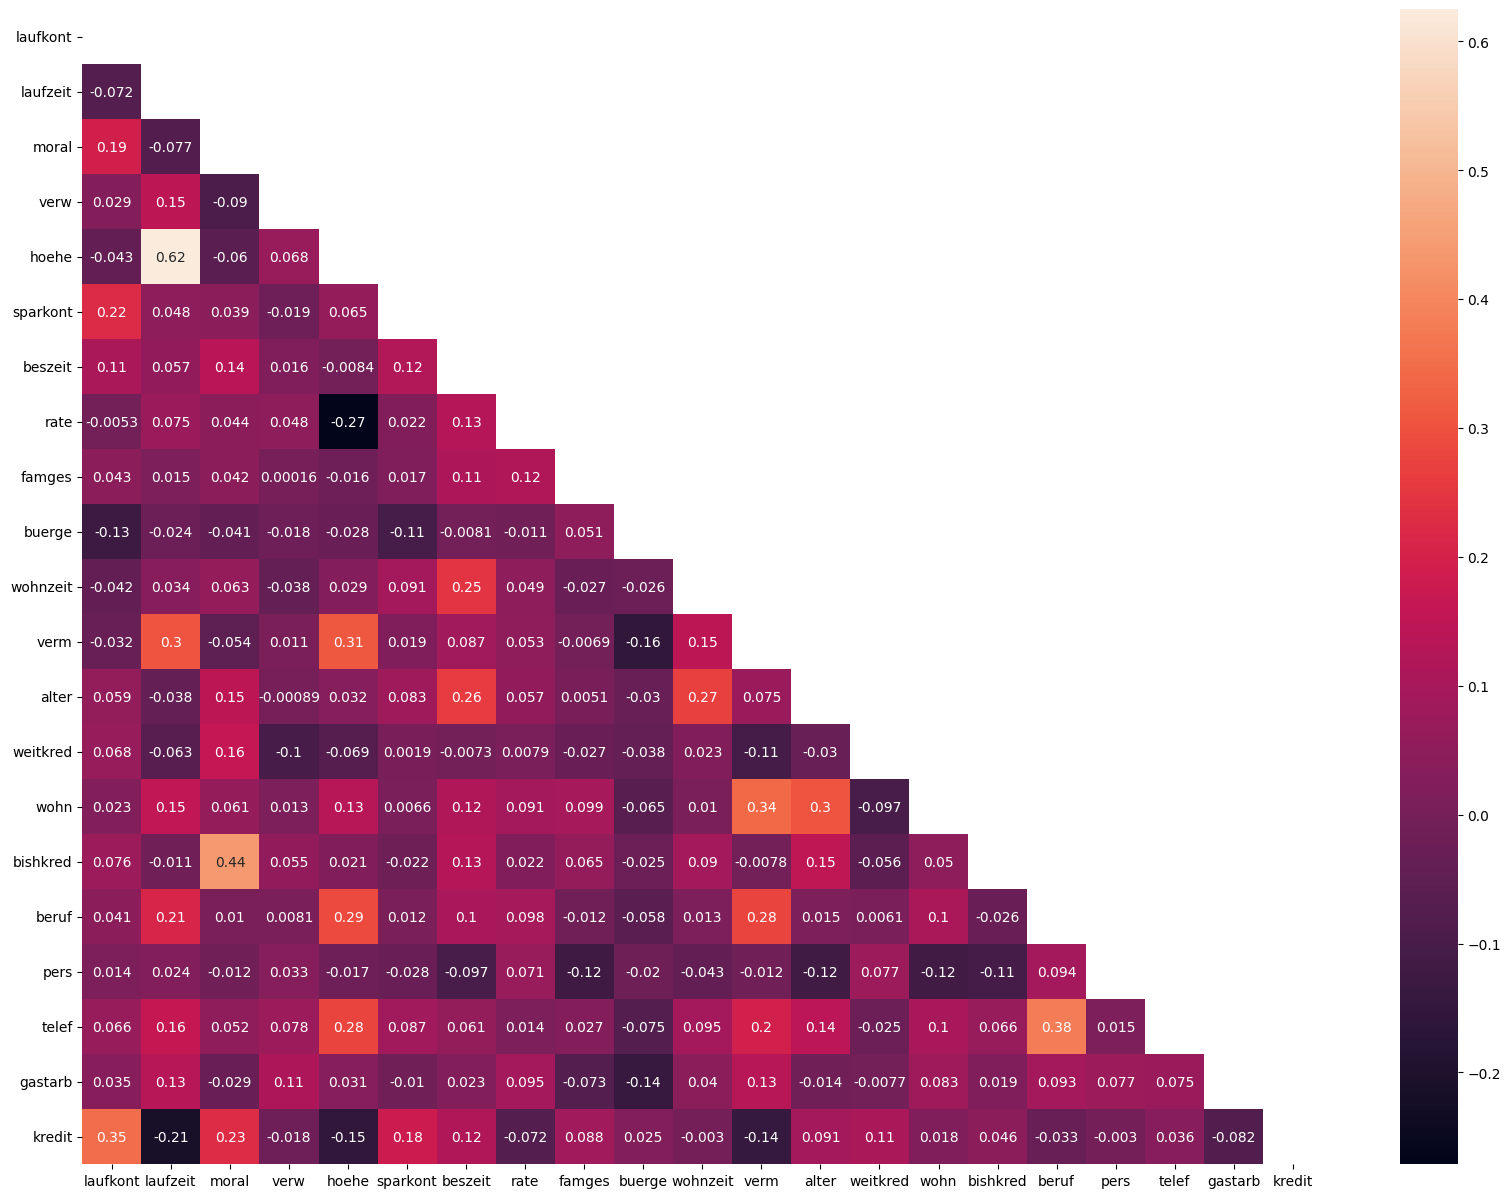

In [23]:
# подивимось як зменшення розмірності може впливати на кореляцію між ознаками
import seaborn as sns
cor_matrix = df.corr()

mask = np.triu((np.ones_like(cor_matrix, dtype=bool)))
plt.figure(figsize=(20, 15))

sns.heatmap(cor_matrix, mask=mask, annot=True)

In [30]:
df_reduced[0]

array([-1.72689656, -0.69688571,  0.57997435,  1.17254941,  1.38501508,
        1.19218204,  0.46140045,  0.30009393, -0.49568791, -0.45621648,
       -0.13781809])

<Axes: >

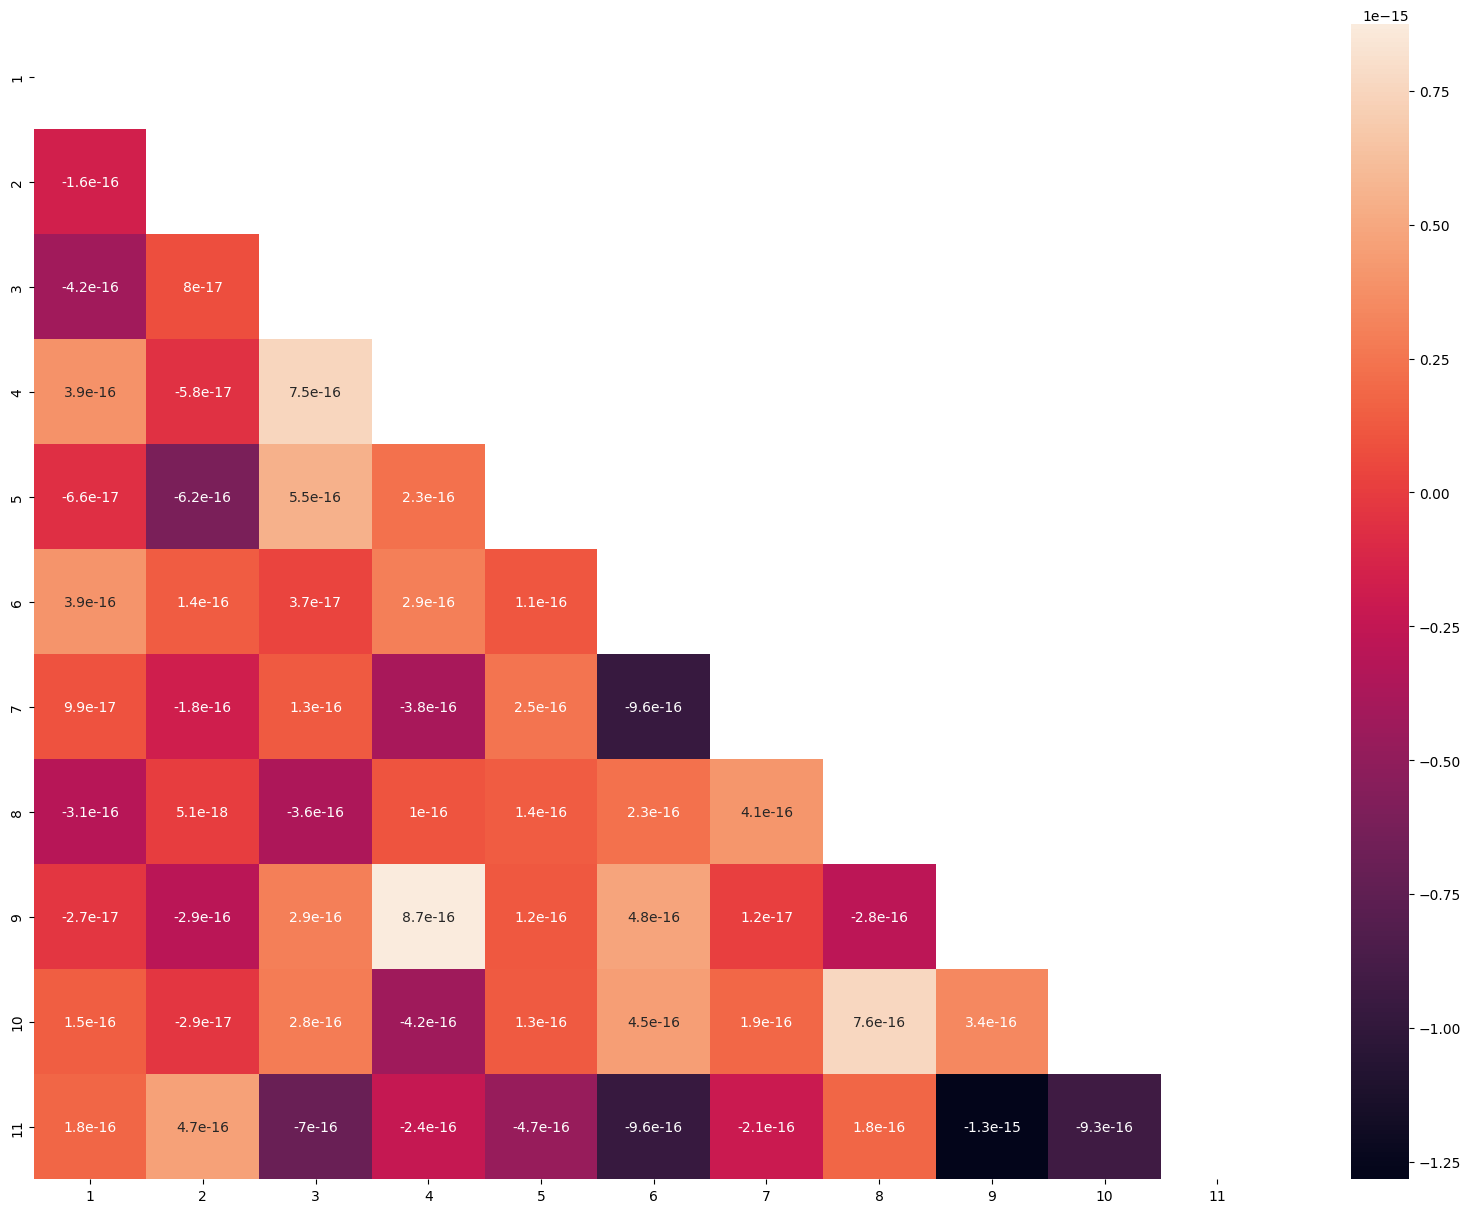

In [35]:
reduced_df = pd.DataFrame(df_reduced, columns=range(1, 12))
corr_matrix = reduced_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, mask=mask, annot=True)

In [ ]:
# бачимо, що наші головні компоненти не кореллють між собою (значення кореліцій дуже близькі до нуля). 
# насправді я забув що вони ортоганальні, ну нічого - тепер побачив наглядно

# така низька кореляція між ознаками має покращити здатнійсть моделей лінійної регресії до навчання. Потрібно перевірити

In [57]:
# візьмемо наш початковий датасет и вигадаємо, що kredit - наш таргет
df[trgt] = target
# df

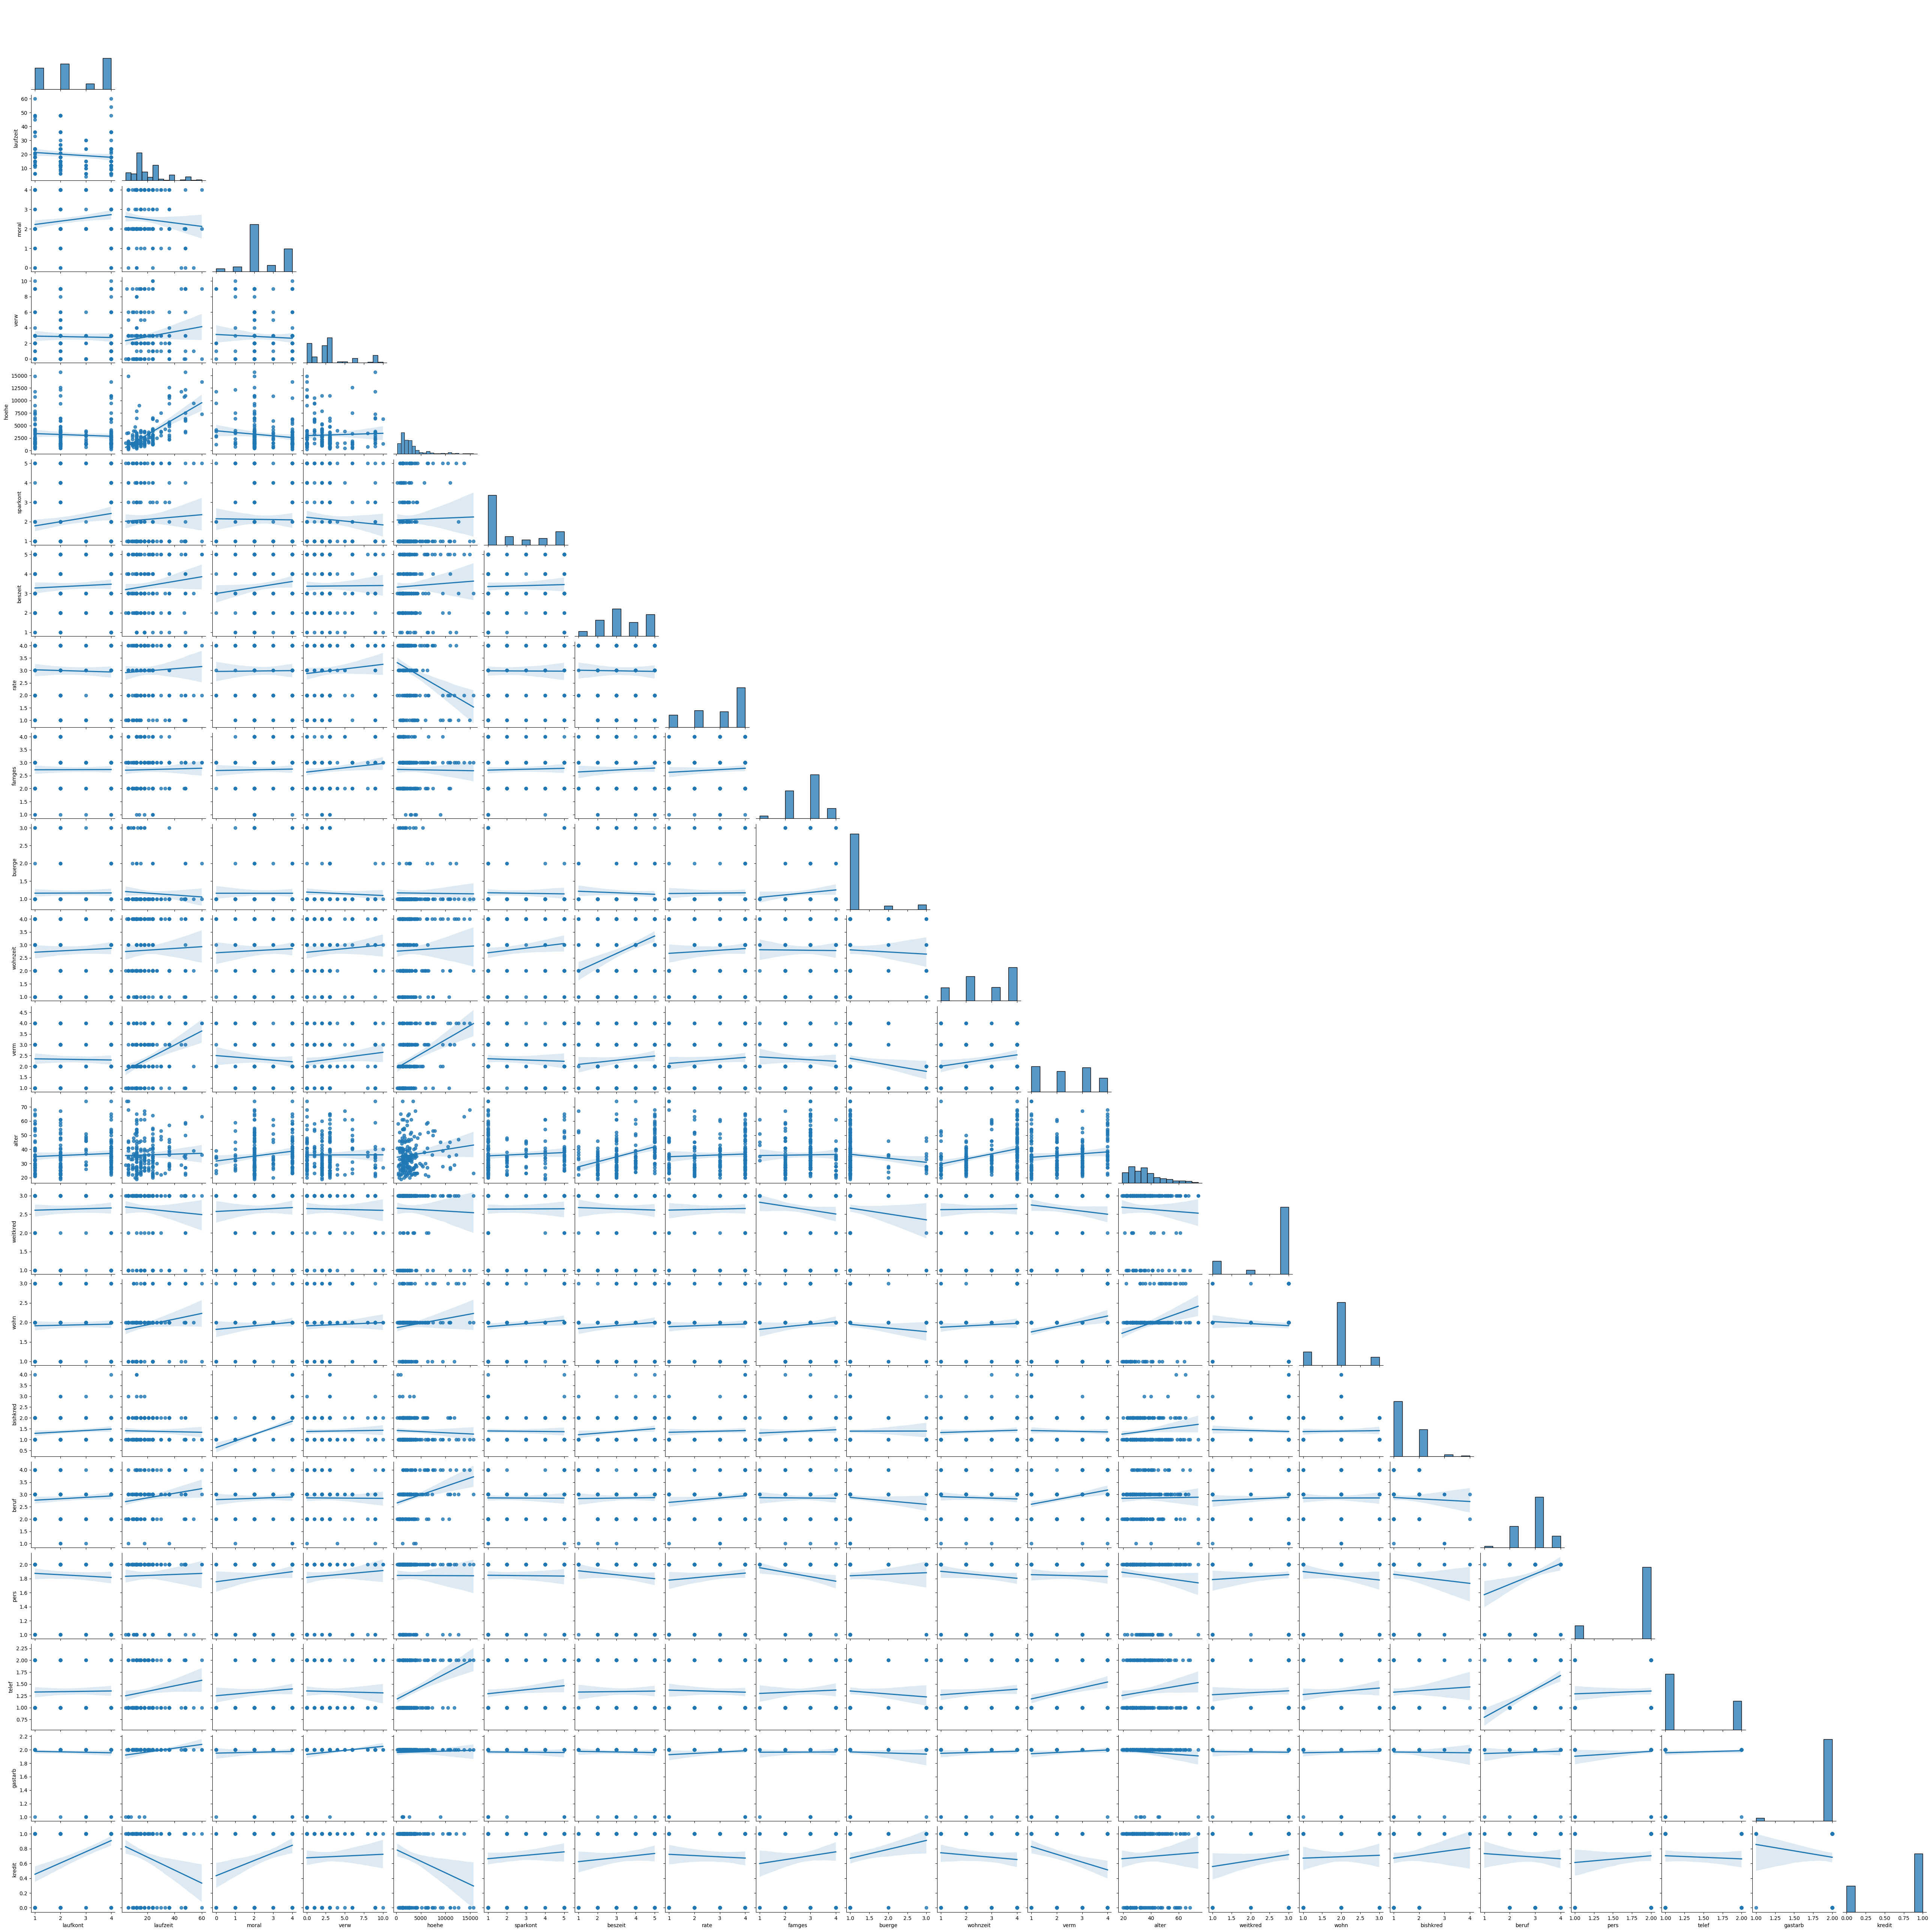

In [58]:
sns.pairplot(df.sample(frac=0.2, random_state=42), corner=True, kind='reg', diag_kind='hist')

In [ ]:
# бачимо певну дискретність даних, тож на високі результати не очікуємо

<Axes: xlabel='kredit'>

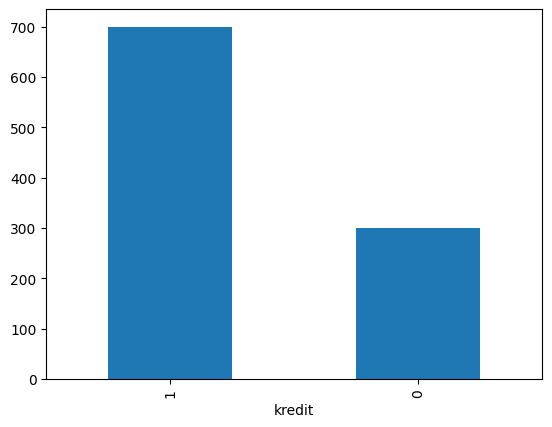

In [53]:
trgt = "kredit"
target = df.pop(trgt)
target.value_counts().plot(kind="bar")

# маємо досить відчутний дісбаланс таргетів, але спробуємо

In [70]:
def plot_results(p, y, regression:bool=True):

    # Перетворюємо на NumPy масиви
    y_np = np.array(y)
    y_pred_np = np.array(p)

    # Отримуємо індекси сортування 
    sorted_indices = np.argsort(y_np)

    # Сортуємо y_full_test і y_pred відповідно до індексів сортування
    y_sorted = y_np[sorted_indices]
    y_pred_sorted = y_pred_np[sorted_indices]
    plt.figure(figsize=(30, 10))

    if regression:
        # Лінія через передбачені точки
        plt.plot(y_pred_sorted, label='Передбачені значення', color='b', linestyle='-', marker='o')
    else:
        plt.scatter(range(len(y_pred_sorted)), y_pred_sorted, label='Передбачені значення', color='b', marker='o')

    # Точки для фактичних значень 
    plt.scatter(range(len(y)), y_sorted, color='r', label='Фактичні значення', alpha=0.7, marker="x")

    plt.xlabel('Індекс зразка')
    plt.ylabel('Значення')
    plt.title('Порівняння передбачених і фактичних значень')
    plt.legend()
    plt.grid(True)
    plt.show()

In [74]:
from sklearn.metrics import precision_score, average_precision_score, f1_score, recall_score
def get_results(p, y) -> dict:
    data_dict = {
        "average_precision": round(average_precision_score(y, p) * 100, 4),
        "precision": round(precision_score(y, p) * 100, 4),
        "recall": round(recall_score(y, p) * 100, 4),
        "f1": round(f1_score(y, p) * 100, 4)
    }
    return data_dict

In [54]:
import statsmodels.api as sm

scaler = StandardScaler()
features = sm.add_constant(scaler.fit_transform(df))

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.15, shuffle=True, stratify=target, random_state=42)

In [72]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(random_state=42)
model.fit(X_train, y_train)


SGDClassifier(random_state=42)

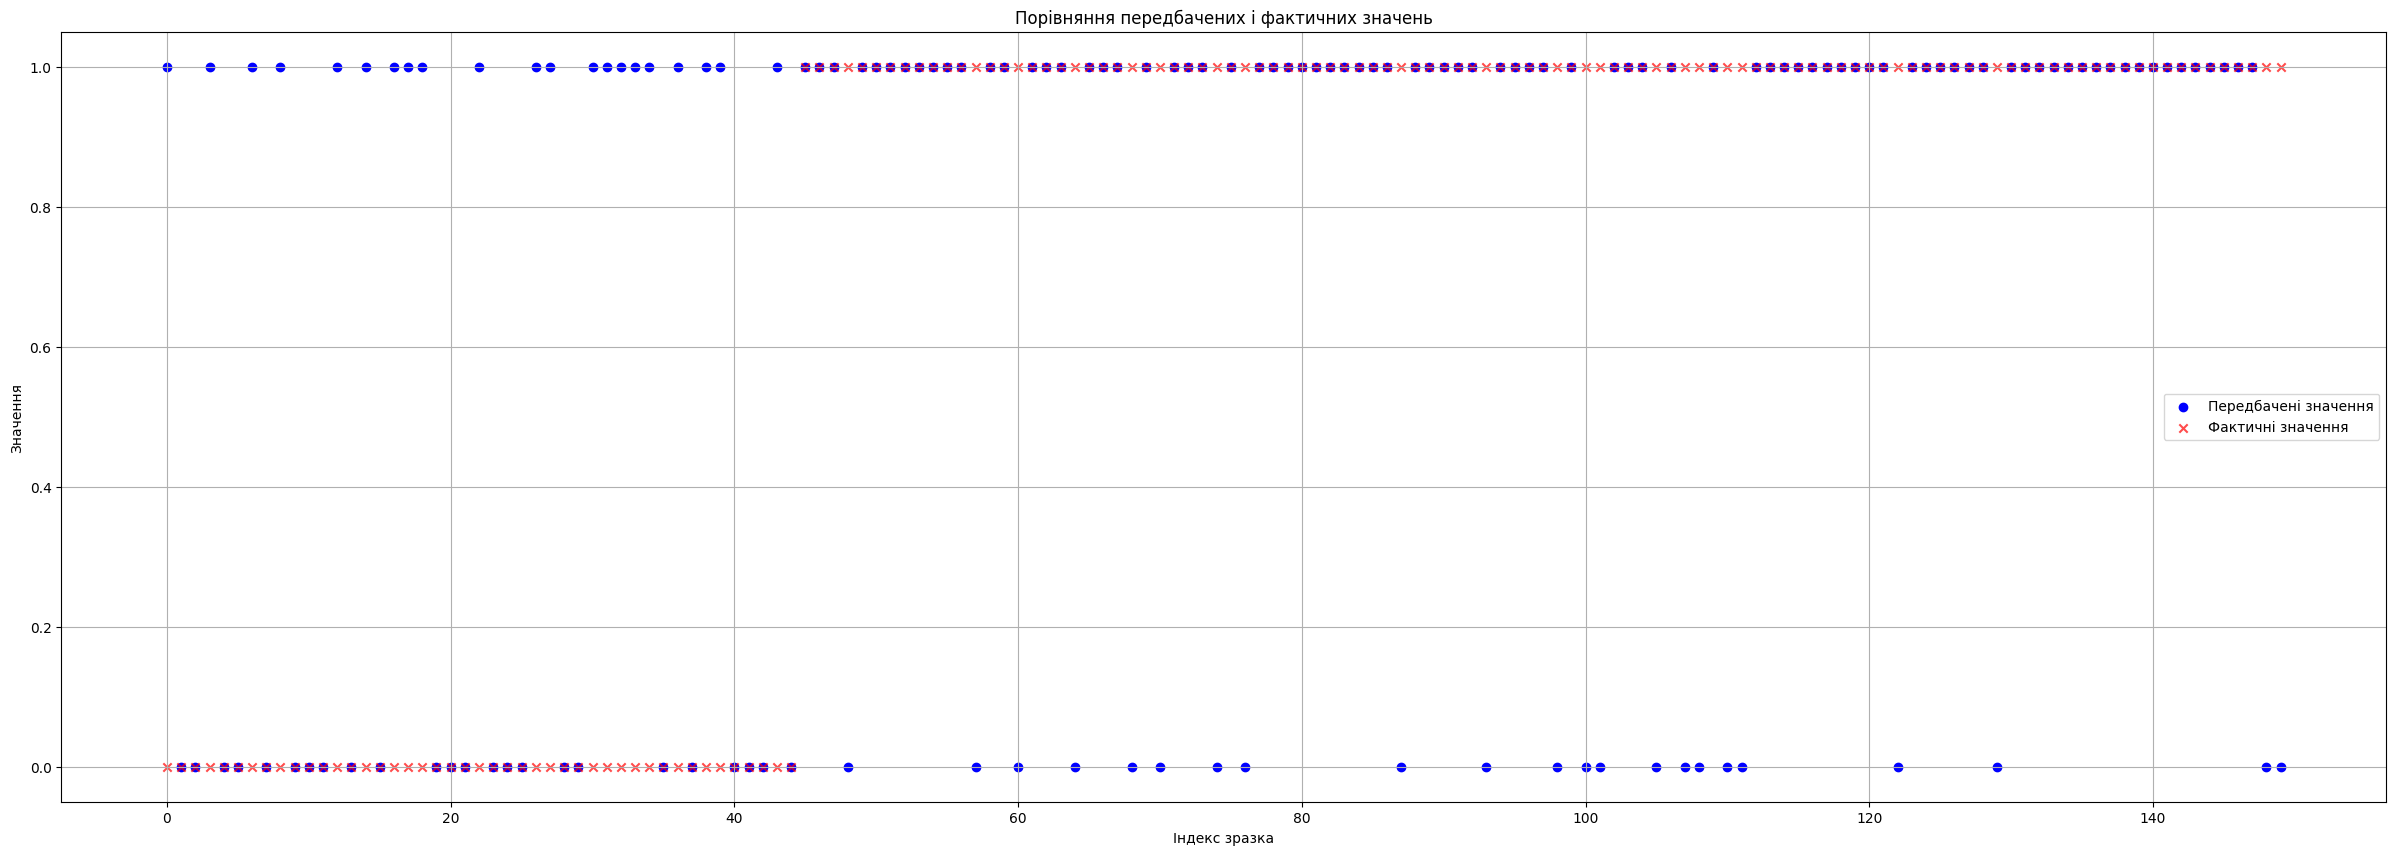

{'average_precision': np.float64(77.7527), 'precision': np.float64(79.8077), 'recall': np.float64(79.0476), 'f1': np.float64(79.4258)}


In [75]:
res = model.predict(X_test)
plot_results(res, y_test, regression=False)
metrics = get_results(res, y_test)
print(metrics)

In [ ]:
# маємо AP 77.8 % - чеснокажучі це навіть більше ніж я очікував

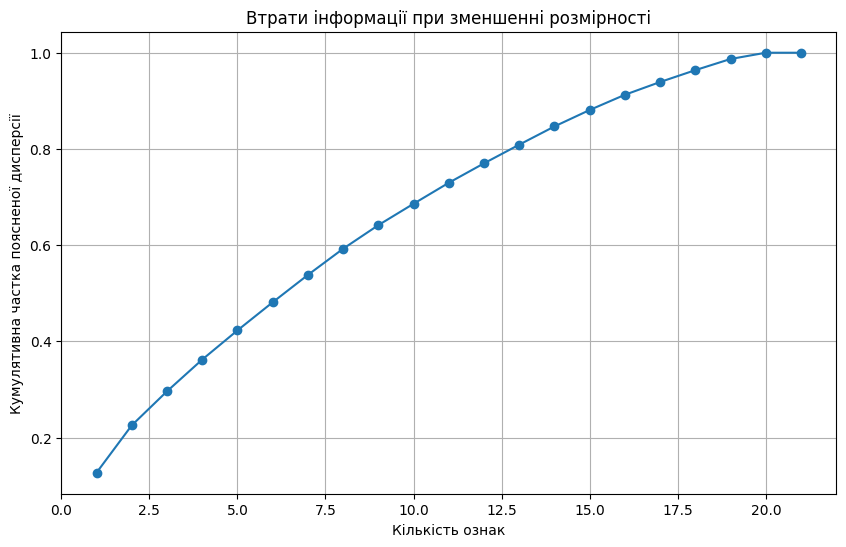

In [77]:
pca = PCA(random_state=42)
pca.fit(features)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
# Побудова графіку втрати інформації при зменшенні розмірності
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-') 
plt.xlabel('Кількість ознак')
plt.ylabel('Кумулятивна частка поясненої дисперсії')
plt.title('Втрати інформації при зменшенні розмірності')
plt.grid()
plt.show()

In [78]:
cumulative_variance

# цікава історія: ми можемо зменшити розмірність на 1 і взагалі не втратити дані.

array([0.12679607, 0.22522498, 0.29597514, 0.36198575, 0.42262891,
       0.48109088, 0.53800549, 0.59242289, 0.64149368, 0.68596767,
       0.72959649, 0.77002556, 0.80883471, 0.84674595, 0.88094141,
       0.9125893 , 0.93913444, 0.96380596, 0.98699749, 1.        ,
       1.        ])

In [79]:
target_index = np.argmax(cumulative_variance >= .7)
componet_count = target_index + 1
componet_count # так само, кажуть, нам потрібно всього 11 головних компонент для збереження 70% інформації, насправді навіть 73

np.int64(11)

In [82]:
features_reduced = pca.transform(features)[:, :componet_count]
features_reduced[0]

array([-1.7619311 , -0.61767983,  1.07878585,  0.5523114 ,  0.05329815,
       -2.00925621, -0.32104899,  0.30417628, -0.81630566, -1.1551254 ,
       -0.57374035])

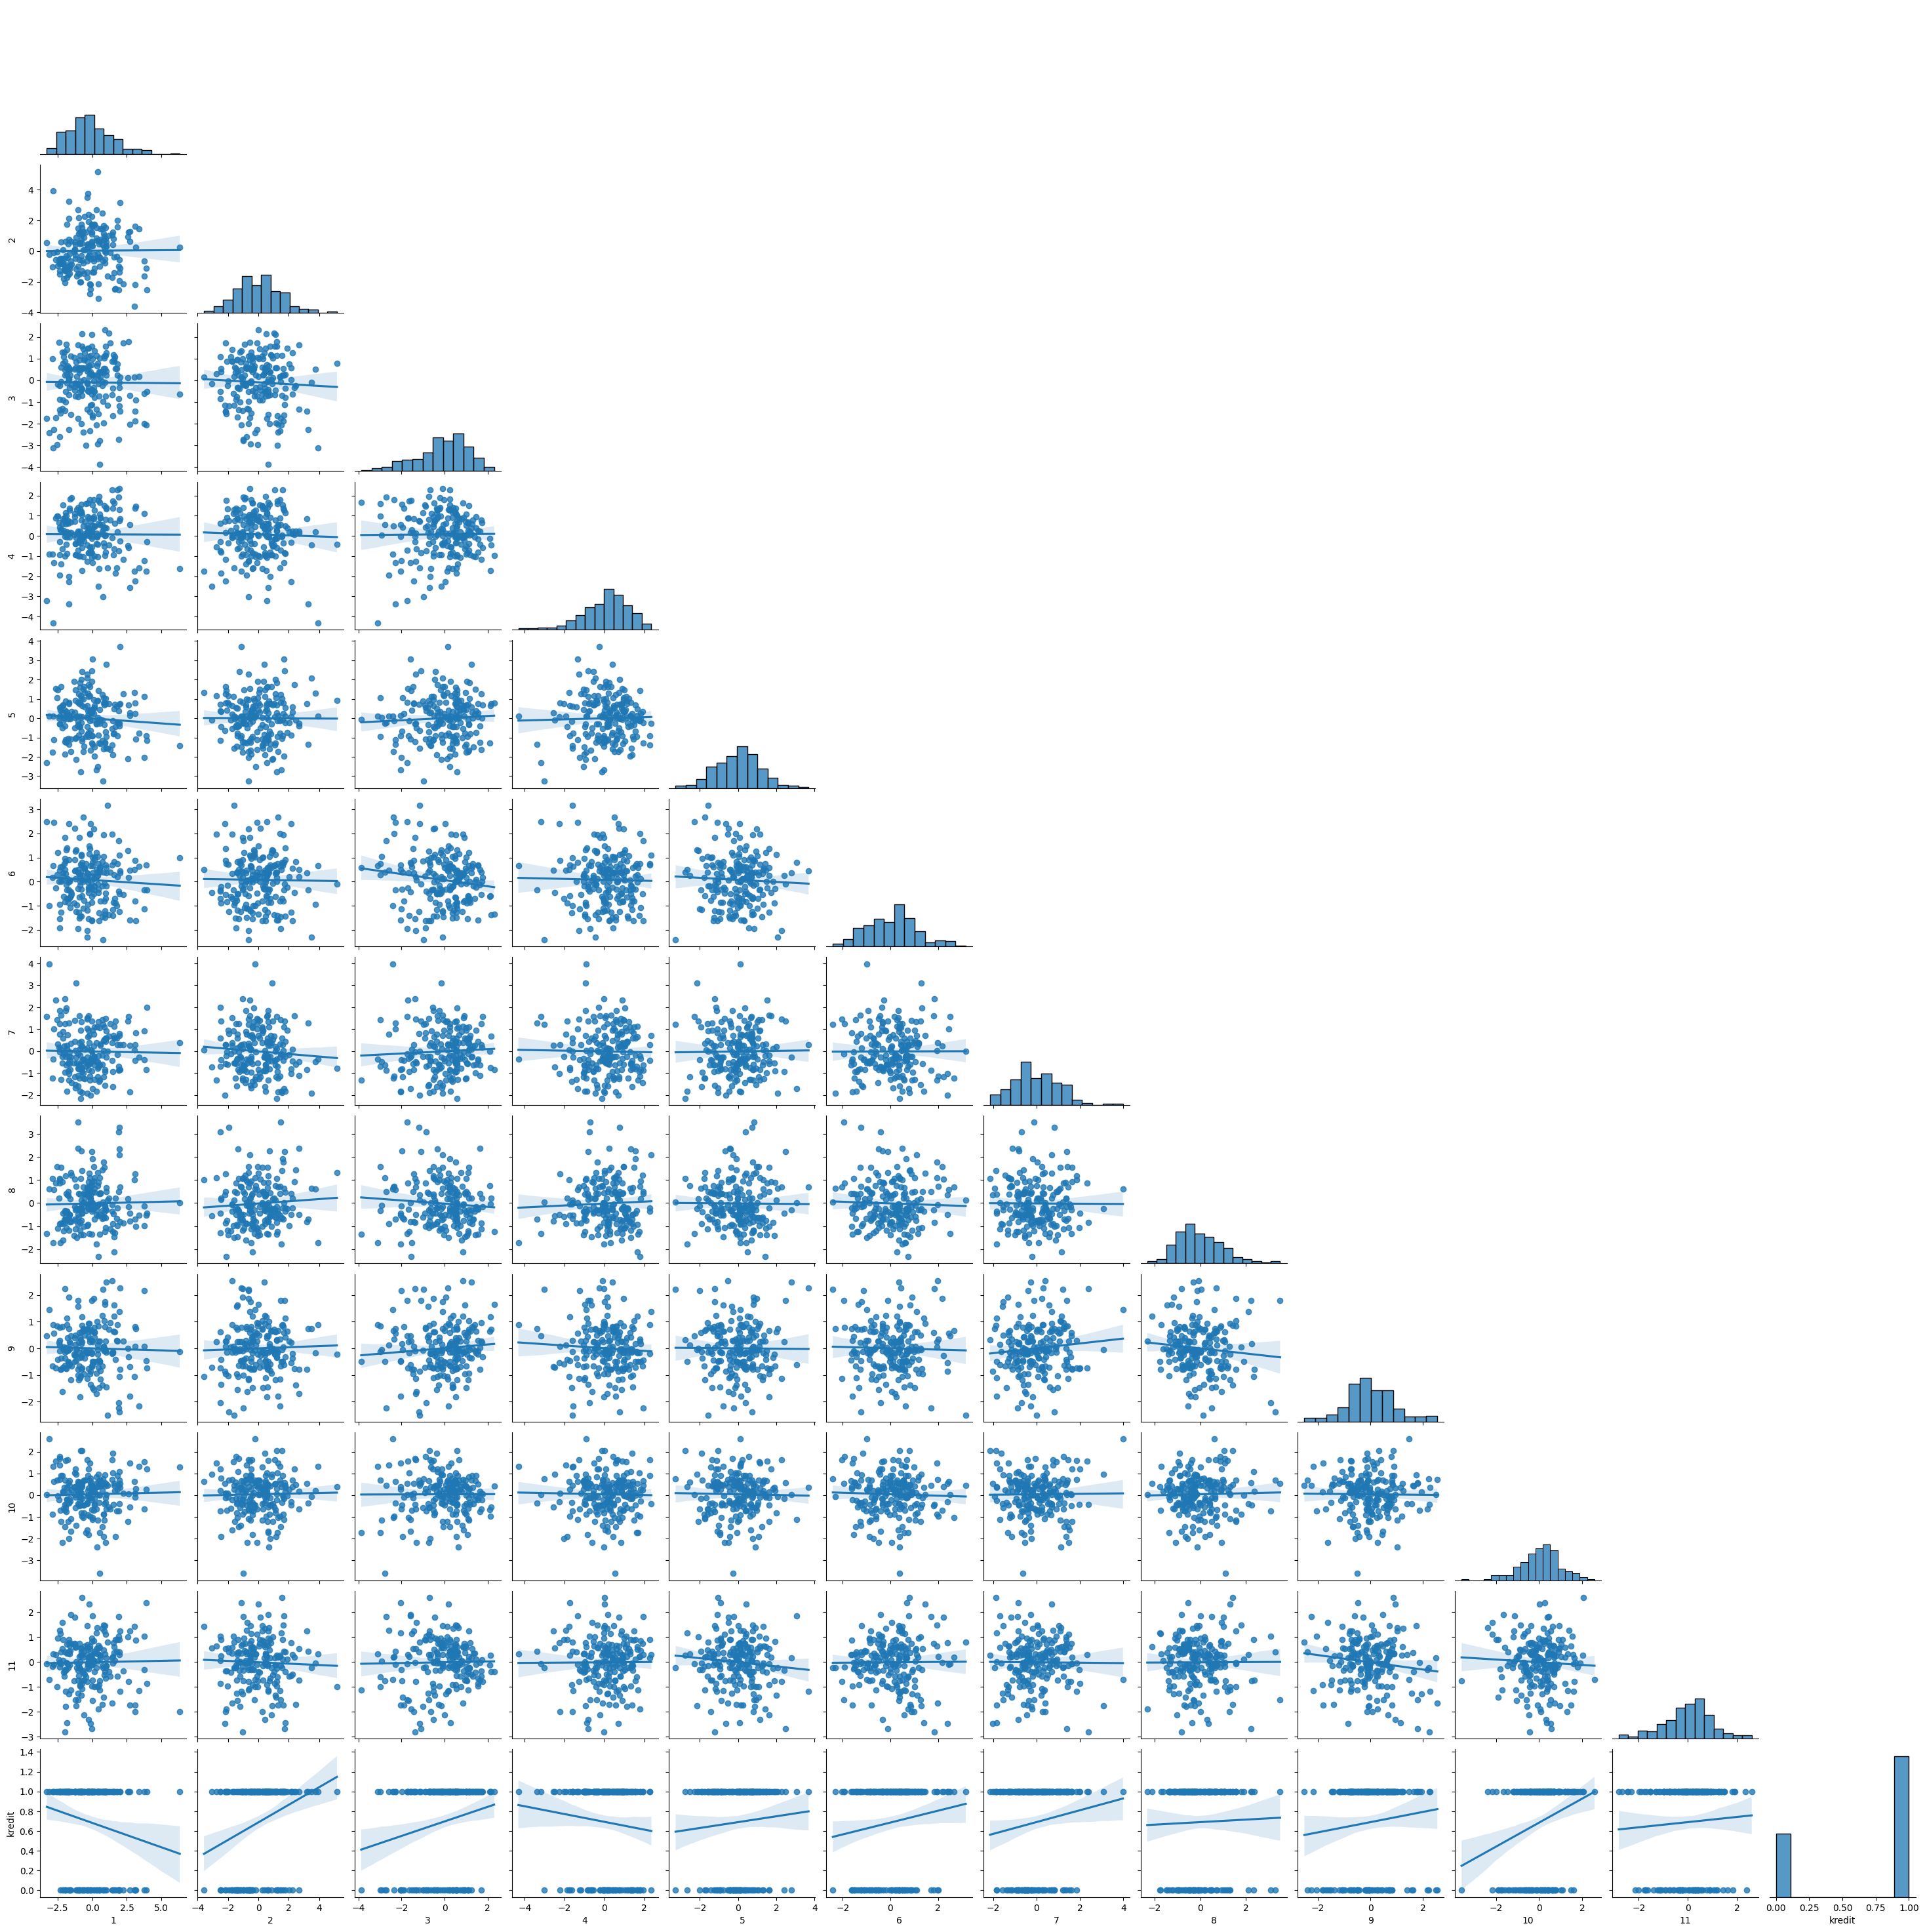

In [87]:
df_reduced = pd.DataFrame(features_reduced, columns=range(1, 12))
df_reduced[trgt] = target
df_reduced
sns.pairplot(df_reduced.sample(frac=0.2, random_state=42), corner=True, kind='reg', diag_kind='hist')

In [ ]:
# як і очікувалось ми бачимо що лінії тренду у графіках розсіювання ознак в основному горизонтальні, тож суттєві залежності або кореляції між фічами відсутні

In [83]:
X_train, X_test, y_train, y_test = train_test_split(features_reduced, target, test_size=.15, shuffle=True, stratify=target, random_state=42)

In [88]:
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train)

SGDClassifier(random_state=42)

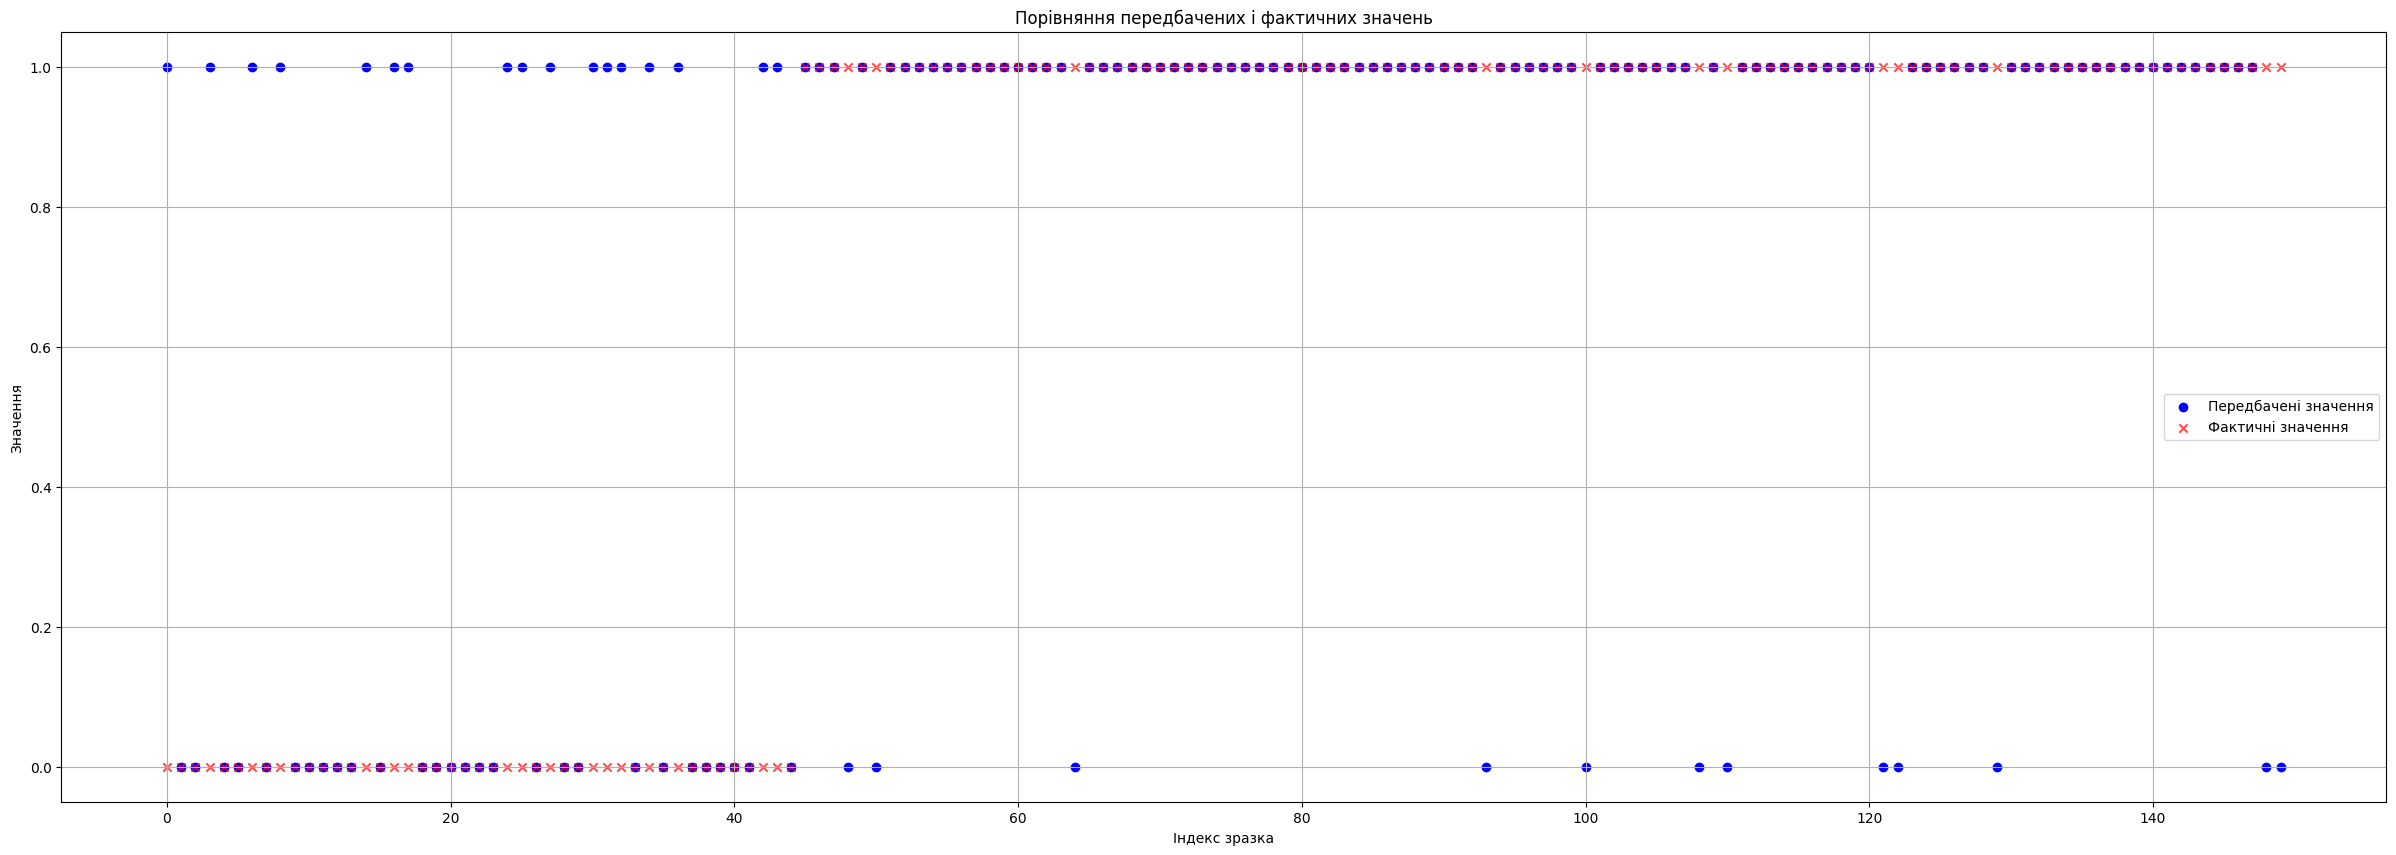

{'average_precision': np.float64(82.8831), 'precision': np.float64(84.5455), 'recall': np.float64(88.5714), 'f1': np.float64(86.5116)}


In [91]:
res = model.predict(X_test)

plot_results(res, y_test, regression=False)
metrics = get_results(res, y_test)
print(metrics)

In [ ]:
#  цікава історія: ми фактично зменшили кількість ознак вдвічі, але при цьому підняли наші показники моделі. 


З цієї домашки я побачив, що зменшення розмірності це потужний механізм, який дозволяє не тільки знайти баланс між кількістю ознак і кількостю інформації, яку вони відображають, а в деяких випадках взагалі зменшивши кількість ознак і не втратити інформацію. Також цей механізм дозволяє розривати зайві кореляції між ознаками, що значно покращує продуктивність моделей лінійної регресії